In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Iris Clustering Exercises

## 1. Clustering with the Iris Dataset
    - using the lesson as a guide, perform clustering on a dataset

### a. Choose features other than the ones used in the lesson.


In [2]:
iris = data('iris')
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris[['sepal_width', 'petal_width']]
X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


In [4]:
scaler = MinMaxScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,sepal_width,petal_width
1,0.625000,0.041667
2,0.416667,0.041667
3,0.500000,0.041667
4,0.458333,0.041667
5,0.666667,0.041667


In [5]:
kmeans = KMeans(n_clusters=3, random_state = 123)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [6]:
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

### b. Visualize results of clustering

In [15]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids = iris.groupby('cluster')['sepal_length','petal_length'].mean()

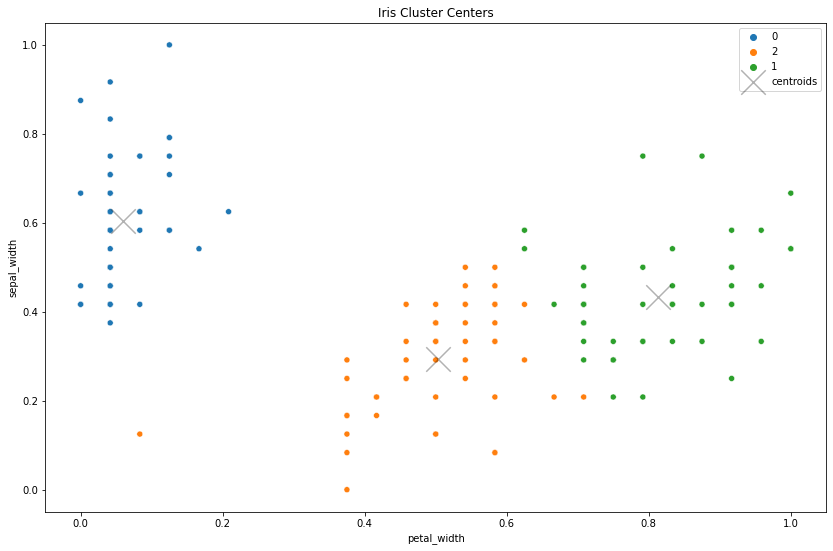

In [28]:
# lets visualize the clusters along with the centers on scaled data.
iris['cluster'] = iris['cluster'].astype('str')
X_scaled['cluster'] = X_scaled['cluster'].astype('str')
plt.figure(figsize=(14, 9))
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), s = 600, color = 'k', marker = 'x', alpha = .3, label = 'centroids')
plt.title('Iris Cluster Centers')
plt.legend();

### c. Use the elbow method to visually select a good value for k 

In [19]:
k = 2
kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

31.66489793111964

In [20]:
k = 3
kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

3.576804853066748

In [21]:
k = 4
kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

2.9012419226645307

In [23]:
k = 5
kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

2.2433940455086203

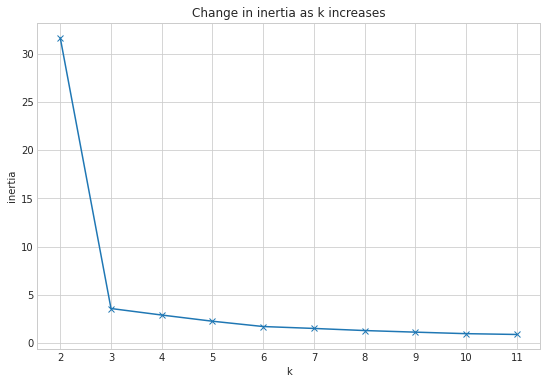

In [27]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

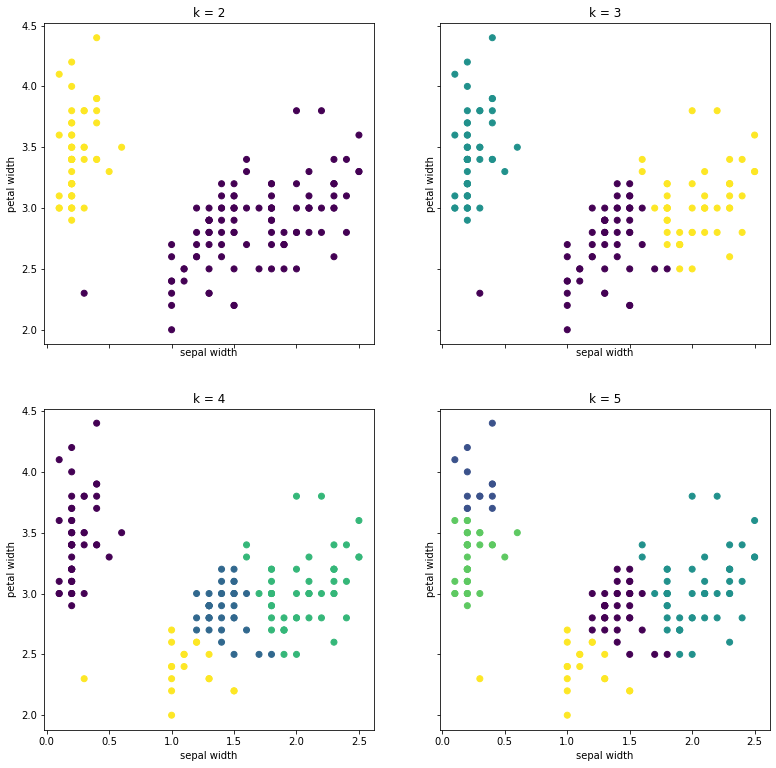

In [26]:
g, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.petal_width, X.sepal_width,  c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')

The rate of inertia change in the k means calculations suggests that k = 3 is the best to use. k = 2 has an extremely high residual, but risidual does not drastically change after k = 3. Visual analysis does show groups that make sense at k = 3 

### d. Repeat the clustering, this time with 3 different features